# Homework 4 - Genetic Networks #

## Negative Feedback Loop - Stress Response ##

Consider Stress molecules (S) that are controlled by Enzymes (E) which are controlled by Repressors (R). The concentrations of these components are regulated by the following equations:

$$ \frac{dR}{dt} = \frac{\gamma}{1+(\frac{R}{k})^h} - \frac{R}{\tau_R} + l $$
$$ \frac{dS}{dt} = \Theta_t - \gamma E S $$
$$ \frac{dE}{dt} = \frac{1}{1+(\frac{R}{k})^h} - \frac{E}{\tau_E} $$

Initial conditions: $ S(0) = E(0) = 0, R(0) = 0 $.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

2000
20


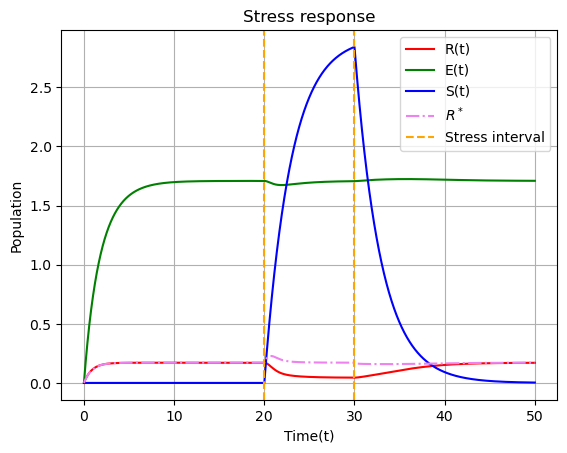

In [57]:
# initial conditions
R0 = 0
S0 = 0
E0 = 0

par = [0.2,1,1,0,1,2,[20,30]]

# we define Theta_t(t), which is the stress source, to be a step function that activates and spikes at a certain 
# point in time. This makes sense since the stress is usually caused by an abrupt change or signal

def Theta_t(t):
    #return np.where(np.isclose(t,t_th,rtol=1e-4), 1, 0)
    return np.where(t>0,1,0)

# define the equations
def system(y, t, Theta_t, par):
    # par[0] = gamma
    # par[1] = k
    # par[2] = h
    # par[3] = l
    # par[4] = tau_R
    # par[5] = tau_E
    # par [6] = t_th (t_s: stress point)
    
    R, E, S = y
    R_star = R * (1+S)
    drdt = par[0] / (1 + (R_star/par[1])**par[2]) - (R_star/par[4]) + par[3]
    dedt = 1 / (1+(R_star/par[1])**par[2]) - (E / par[5])
    dsdt = Theta_t(t-par[6][0])*(1-Theta_t(t-par[6][1])) - par[0] * E * S   
    return [drdt,dedt,dsdt]

# set the time space
t_s = np.linspace(0,50,5000)

print(np.sum(Theta_t(t_s-par[6][0])*(1-Theta_t(t_s-par[6][1]-10))))
print(par[6][0])

# Solve 
R= odeint(system, [R0,E0,S0], t_s, args=(Theta_t,par))[:,0]
E = odeint(system, [R0,E0,S0], t_s, args=(Theta_t,par))[:,1]
S = odeint(system, [R0,E0,S0], t_s, args=(Theta_t,par))[:,2]
plt.plot(t_s, R, c='r', label='R(t)')
plt.plot(t_s, E, c='g', label='E(t)')
plt.plot(t_s, S,  c='b', label='S(t)')
plt.plot(t_s, R*(1+S), c='violet', linestyle='-.', label='$R^*$')
plt.axvline(par[6][0], c='orange', linestyle='--', label='Stress interval')
plt.axvline(par[6][1], c='orange', linestyle='--')
plt.legend()
plt.grid()
plt.xlabel('Time(t)')
plt.ylabel('Population')
plt.title('Stress response')
plt.show()


In [2]:
# initial conditions
R0 = 0
S0 = 0
E0 = 0

par = [0.2,1,1,0,1,2,20]

# we define Theta_t(t), which is the stress source, to be a step function that activates and spikes at a certain 
# point in time. This makes sense since the stress is usually caused by an abrupt change or signal

def Theta_t(t, t_th):
    
    index = np.random.randint(t.shape[0])
    return np.where(t == t_th, 1, 0)

# define the equations
def dr(R, t, par):
    # par[0] = gamma
    # par[1] = k
    # par[2] = h
    # par[3] = l
    # par[4] = tau_R
    # par[5] = tau_E
    # par [6] = t_th (t_s: stress point)
    
    drdt = par[0] / (1 + (R/par[1])**par[2]) - (R/par[4]) + par[3]
    return drdt

def ds(S, t, E, Theta_t, par):
    
    dsdt = Theta_t(t) - par[0] * E * S       
    return dsdt

def de(E, t, R, par):
    
    dedt = 1 / (1+(R/par[1])**par[2]) - E / par[5]
    print(dedt)
    return dedt

# set the time space
t_s = np.linspace(0,50,5000)
print(t_s)

print(Theta_t(t_s)[0:50])

de(0,t_s,0, par)

# Solve 
R = odeint(dr, R0, t_s, args=(par,))
E = odeint(de, E0, t_s, args=(R,par))
#S = odeint(ds, S0, t_s, args=(E, Theta_t, par))
plt.plot(R, t_s, c='r', label='R(t)')
plt.plot(E, t_s, c='g', label='E(t)')
plt.plot(S, t_s, c='b', label='S(t)')
plt.legend()
plt.grid()
plt.xlabel('t')
plt.ylabel('Population')
plt.title('Stress response')
plt.show()


[0.00000000e+00 1.00020004e-02 2.00040008e-02 ... 4.99799960e+01
 4.99899980e+01 5.00000000e+01]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
1.0
[[1.        ]
 [0.99801549]
 [0.99606237]
 ...
 [0.85410197]
 [0.85410197]
 [0.85410197]]


RuntimeError: The array return by func must be one-dimensional, but got ndim=2.